In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csv_path = r'D:\dataset\final sheet - Copy.csv'
dataset = pd.read_csv(csv_path)

In [3]:
input_data = dataset.drop(columns = ["UCS"])
output_data = dataset['UCS']
from sklearn.preprocessing import minmax_scale
X =  minmax_scale(input_data, feature_range=(0,1))
Y = minmax_scale(output_data, feature_range=(0,1))

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=1)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [6]:
y_pred = regressor.predict(X_test)

In [7]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0465404816727562
Mean Squared Error: 0.0071344010513433075
Root Mean Squared Error: 0.08446538374590687


In [8]:
from sklearn.metrics import r2_score
print('correlation fatcor',r2_score(y_test, y_pred))

correlation fatcor 0.8267428494564187


In [9]:
importance = regressor.feature_importances_
importance

array([0.05968873, 0.09345396, 0.06046027, 0.03909734, 0.11263976,
       0.00289944, 0.2512909 , 0.01553933, 0.03818631, 0.07176955,
       0.03037918, 0.22459524])

Feature: 0, Score: 0.05969
Feature: 1, Score: 0.09345
Feature: 2, Score: 0.06046
Feature: 3, Score: 0.03910
Feature: 4, Score: 0.11264
Feature: 5, Score: 0.00290
Feature: 6, Score: 0.25129
Feature: 7, Score: 0.01554
Feature: 8, Score: 0.03819
Feature: 9, Score: 0.07177
Feature: 10, Score: 0.03038
Feature: 11, Score: 0.22460


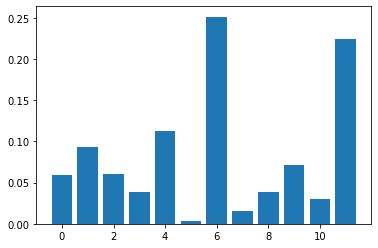

In [10]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()